## Importing Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\Krishnakant Pal\OneDrive\Desktop\Work\Binary_Classification_with_a_Bank_Churn_Dataset\dataset\train.csv")

In [6]:
df

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  
0             181449.97       0  
1              49503.50       0  
2             184866.69       0  
3              84560.88       0  
4              15068.83       0  
...                 ...     ...  
165029        131834.75       0  
165030        131834.45       0  
165031        127429.56       0  
165032         71173.03       0  
165033         61581.79       1  

[165034 rows x 14 columns]

## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['CustomerId','id'],inplace=True,axis=1)

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df.describe()

CreditScore            Age         Tenure        Balance  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean      656.454373      38.125888       5.020353   55478.086689   
std        80.103340       8.867205       2.806159   62817.663278   
min       350.000000      18.000000       0.000000       0.000000   
25%       597.000000      32.000000       3.000000       0.000000   
50%       659.000000      37.000000       5.000000       0.000000   
75%       710.000000      42.000000       7.000000  119939.517500   
max       850.000000      92.000000      10.000000  250898.090000   

       NumOfProducts      HasCrCard  IsActiveMember  EstimatedSalary  \
count  165034.000000  165034.000000   165034.000000    165034.000000   
mean        1.554455       0.753954        0.497770    112574.822734   
std         0.547154       0.430707        0.499997     50292.865585   
min         1.000000       0.000000        0.000000        11.580000   
25%         1.000000       1.000000        0.000000     74637.570000   
50%         2.000000       1.000000        0.000000    117948.000000   
75%         2.000000       1.000000        1.000000    155152.467500   
max         4.000000       1.000000        1.000000    199992.480000   

              Exited  
count  165034.000000  
mean        0.211599  
std         0.408443  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

<AxesSubplot:>

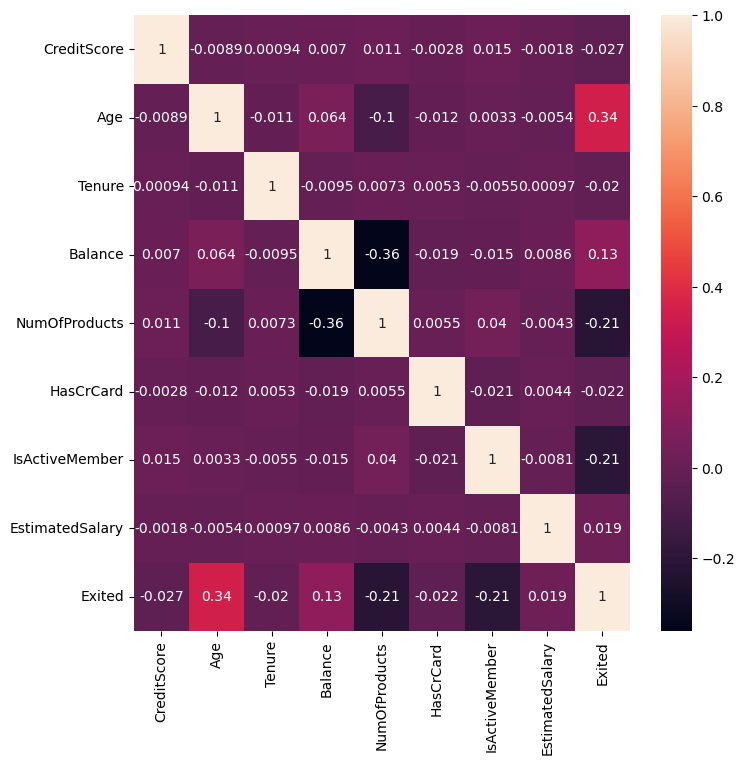

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head(1)

Surname  CreditScore Geography Gender   Age  Tenure  Balance  \
0  Okwudilichukwu          668    France   Male  33.0       3      0.0   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              2        1.0             0.0        181449.97       0

In [14]:
cat_column = ['Surname','Gender','Geography','IsActiveMember','Exited','HasCrCard','Tenure','NumOfProducts']
num_column = df.drop(cat_column,axis=1).columns

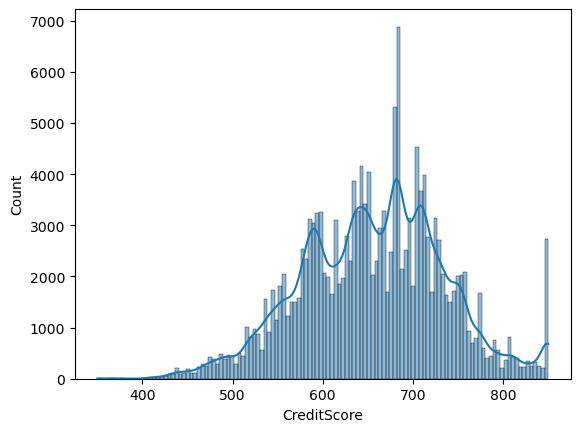

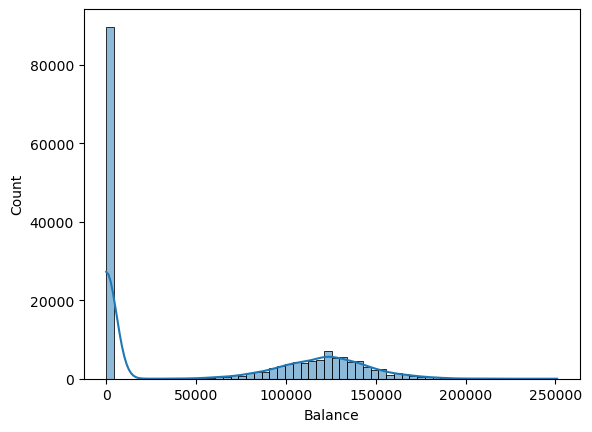

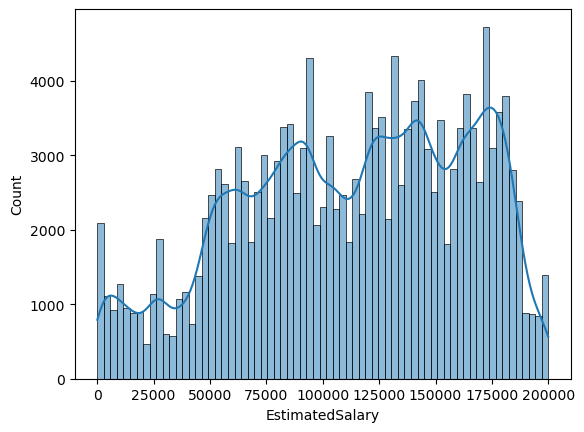

In [15]:
for i in num_column:
    sns.histplot(df[i],kde=True)
    plt.show()

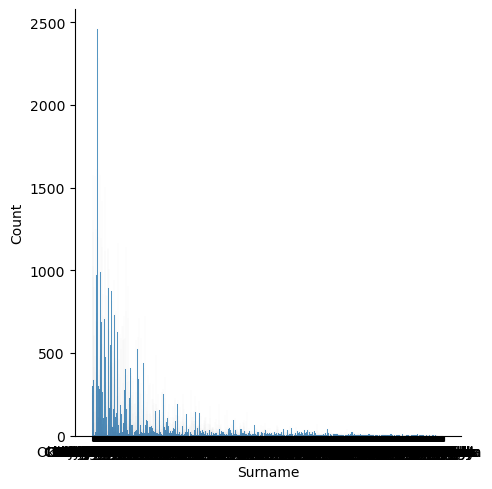

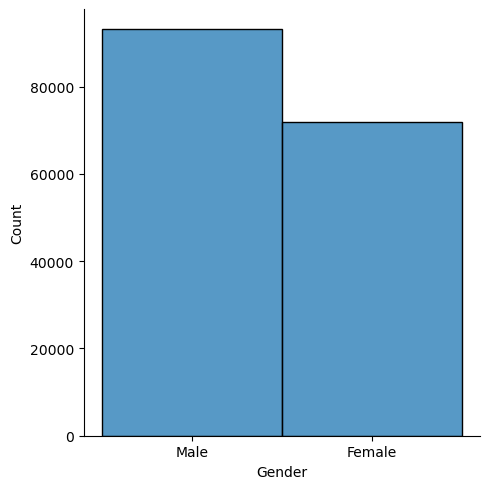

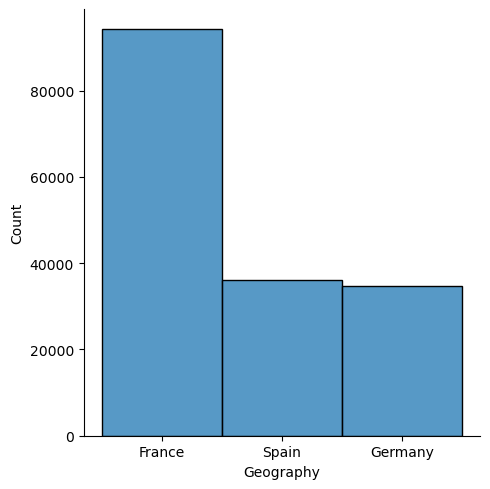

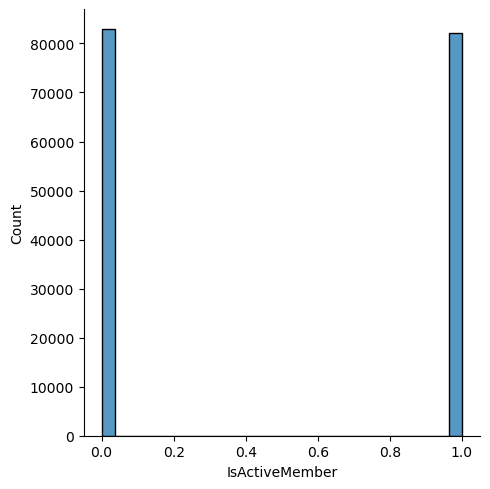

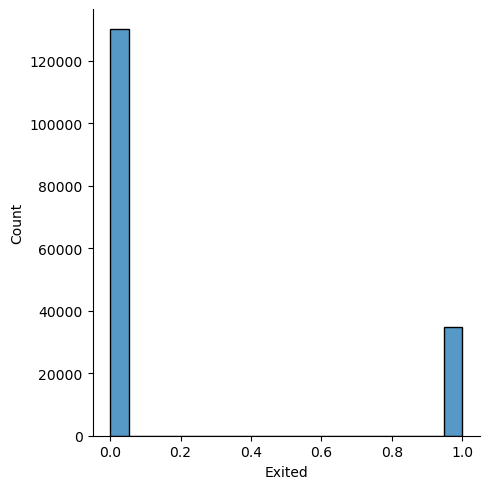

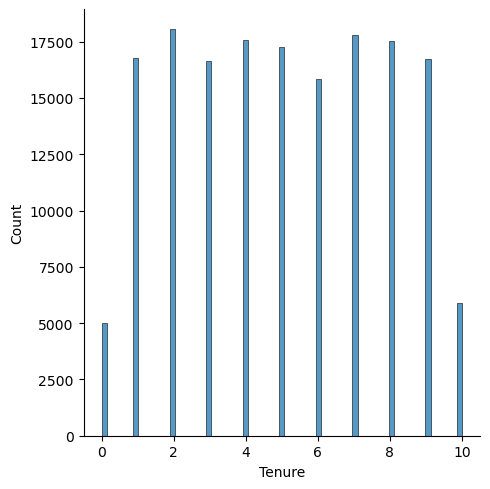

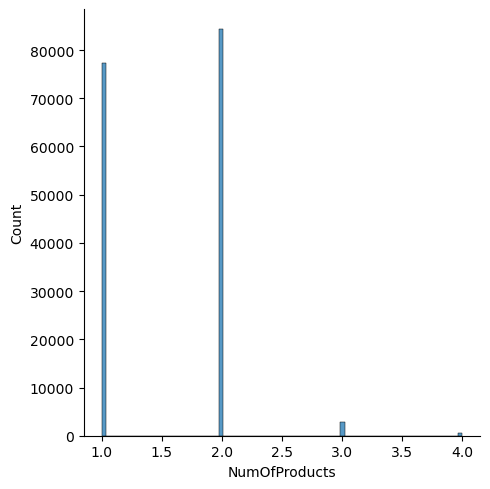

In [16]:
for i in cat_column:
    sns.displot(df[i])

In [17]:
cat_column

['Surname',
 'Gender',
 'Geography',
 'IsActiveMember',
 'Exited',
 'HasCrCard',
 'Tenure',
 'NumOfProducts']

<AxesSubplot:xlabel='Exited', ylabel='count'>

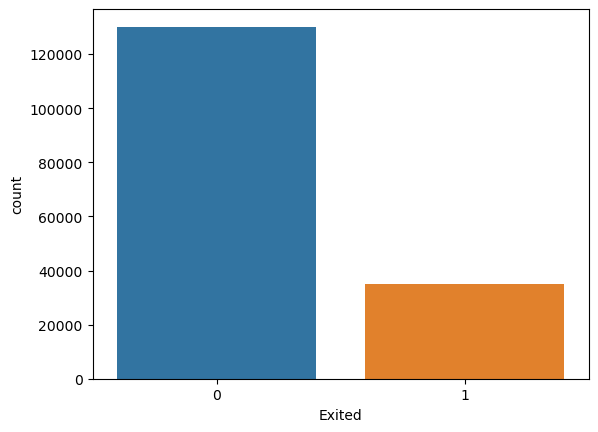

In [18]:
sns.countplot(x='Exited',data=df)


<AxesSubplot:xlabel='Gender', ylabel='Age'>

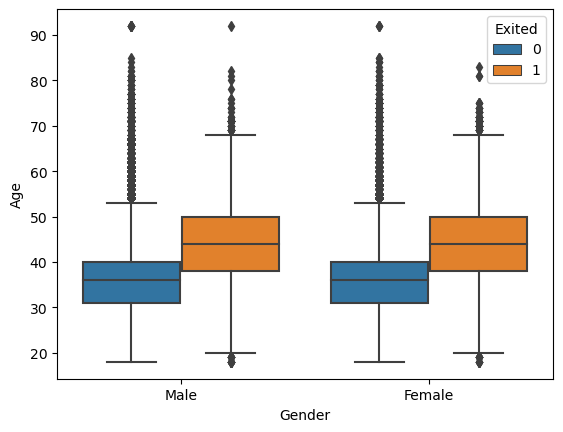

In [19]:
 sns.boxplot(x='Gender',y='Age',hue='Exited',data=df)

``We can see here Average age of the Churn member is higher that the non churn member``

In [20]:
df['NumOfProducts'].unique()

array([2, 1, 3, 4], dtype=int64)

<Figure size 500x500 with 0 Axes>

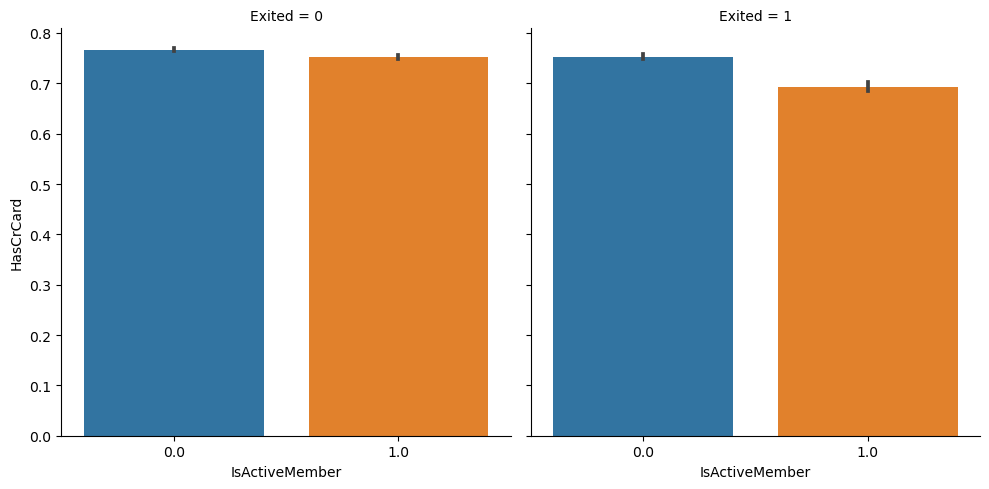

In [21]:
plt.figure(figsize=(5,5))
sns.catplot(data=df,x='IsActiveMember',y='HasCrCard',kind='bar',col='Exited')
plt.show()

<Figure size 200x200 with 0 Axes>

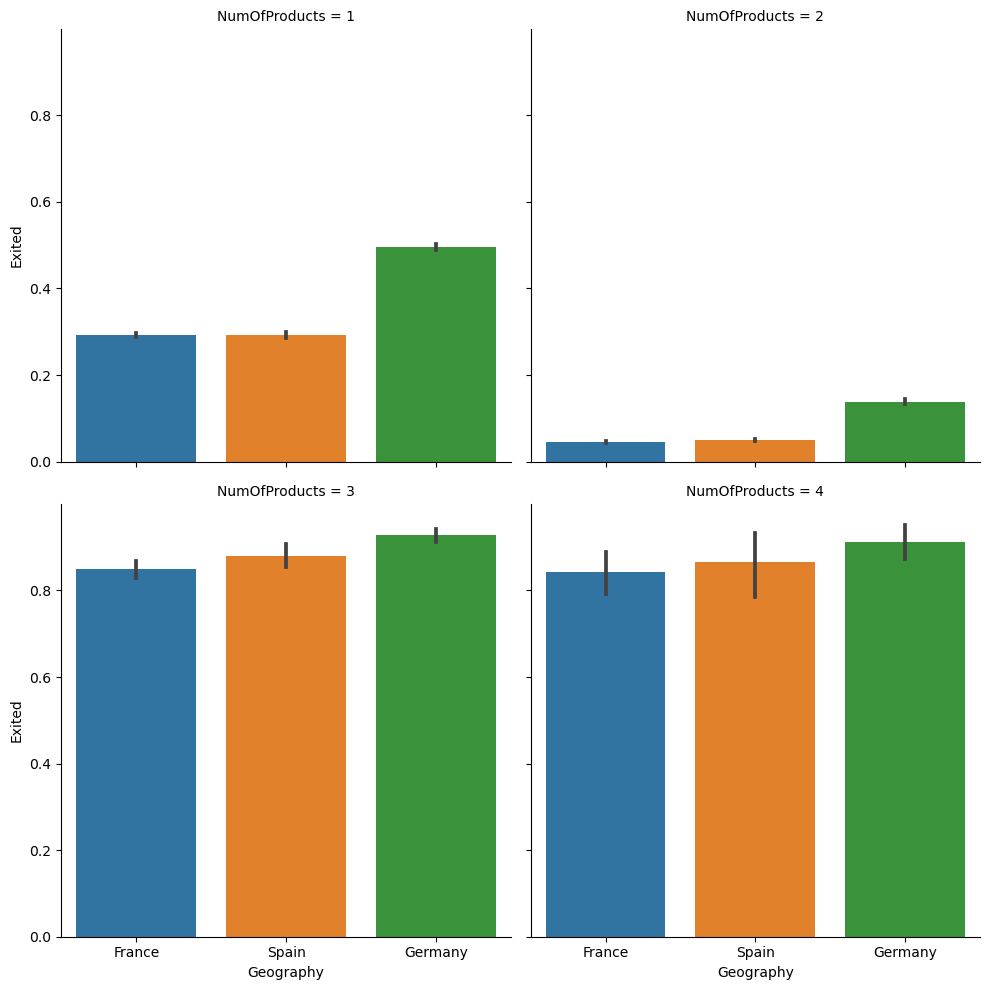

In [22]:
plt.figure(figsize=(2,2))
sns.catplot(data=df,x='Geography',y='Exited',kind='bar',col='NumOfProducts',col_wrap=2)
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='count'>

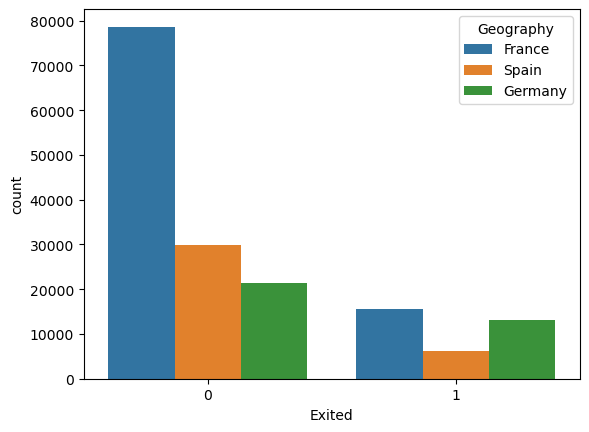

In [23]:
sns.countplot(x='Exited',data=df,hue='Geography')

In [24]:
# Percentage of Bank Churn in each Country
df.groupby('Geography')['Exited'].value_counts(normalize=True)

Geography  Exited
France     0         0.834718
           1         0.165282
Germany    0         0.621048
           1         0.378952
Spain      0         0.827824
           1         0.172176
Name: Exited, dtype: float64

In [25]:
percentage_data = df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack() * 100


In [26]:
percentage_data

Exited             0          1
Geography                      
France     83.471846  16.528154
Germany    62.104837  37.895163
Spain      82.782426  17.217574

Germany has the highest rate of customer Churn of 37%

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

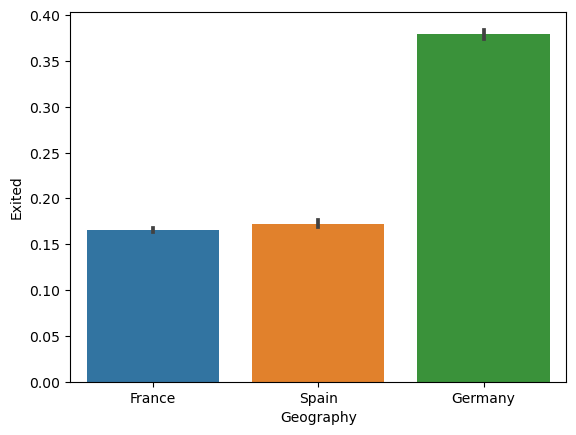

In [27]:
sns.barplot(x='Geography',y='Exited',data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='Geography'>

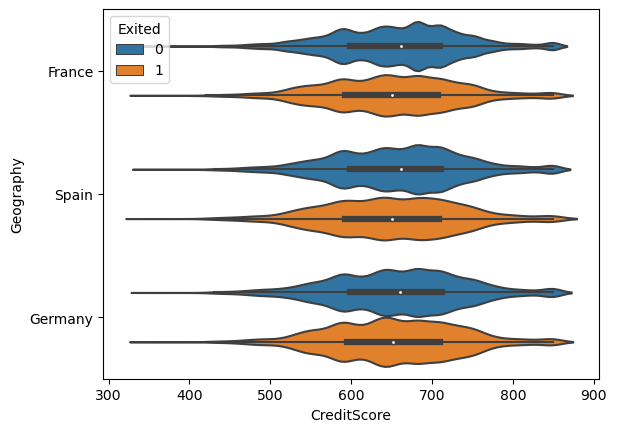

In [28]:
sns.violinplot(x='CreditScore',data=df,y='Geography',hue='Exited')

## Feature Engineering

In [29]:
X = df.drop(['Exited','Surname'],axis=1)

In [30]:
y = df['Exited']

In [31]:
X

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0               668    France    Male  33.0       3       0.00              2   
1               627    France    Male  33.0       1       0.00              2   
2               678    France    Male  40.0      10       0.00              2   
3               581    France    Male  34.0       2  148882.54              1   
4               716     Spain    Male  33.0       5       0.00              2   
...             ...       ...     ...   ...     ...        ...            ...   
165029          667     Spain  Female  33.0       2       0.00              1   
165030          792    France    Male  35.0       3       0.00              1   
165031          565    France    Male  31.0       5       0.00              1   
165032          554     Spain  Female  30.0       7  161533.00              1   
165033          850    France    Male  31.0       1       0.00              1   

        HasCrCard  IsActiveMember  EstimatedSalary  
0             1.0             0.0        181449.97  
1             1.0             1.0         49503.50  
2             1.0             0.0        184866.69  
3             1.0             1.0         84560.88  
4             1.0             1.0         15068.83  
...           ...             ...              ...  
165029        1.0             1.0        131834.75  
165030        0.0             0.0        131834.45  
165031        1.0             1.0        127429.56  
165032        0.0             1.0         71173.03  
165033        1.0             0.0         61581.79  

[165034 rows x 10 columns]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [34]:
cat_column.remove(('Exited'))

In [35]:
cat_column.remove('Surname')

In [36]:
cat_column

['Gender',
 'Geography',
 'IsActiveMember',
 'HasCrCard',
 'Tenure',
 'NumOfProducts']

In [37]:
categorical_cols =  cat_column
numerical_cols = list(num_column)

In [38]:
num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse=False)),
])

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [39]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
full_train_data=pd.DataFrame(preprocessor.fit_transform(X),columns=preprocessor.get_feature_names_out())
# actual_test_data = pd.DataFrame(preprocessor.transform(test_data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)),columns=preprocessor.get_feature_names_out())

In [44]:
X_train

num_pipeline__CreditScore  num_pipeline__Age  num_pipeline__Balance  \
0                       -0.273754           0.324037              -0.886793   
1                        0.500958          -0.352723              -0.886793   
2                       -0.136305           1.790353               0.016606   
3                        0.575930          -0.465517              -0.886793   
4                        0.488462          -0.352723               0.906022   
...                           ...                ...                    ...   
110567                   0.138593           0.775211               0.776620   
110568                   1.175706           0.549624              -0.886793   
110569                   1.200697           0.098451              -0.886793   
110570                   0.351013           1.113592              -0.886793   
110571                   0.126097          -0.352723               1.270668   

        num_pipeline__EstimatedSalary  cat_pipeline__Gender_Female  \
0                           -0.242028                          1.0   
1                           -0.677212                          0.0   
2                            0.781766                          1.0   
3                           -1.239931                          1.0   
4                            0.854352                          0.0   
...                               ...                          ...   
110567                       0.006974                          0.0   
110568                      -0.474488                          0.0   
110569                       1.098383                          1.0   
110570                      -1.744353                          1.0   
110571                       0.544925                          0.0   

        cat_pipeline__Gender_Male  cat_pipeline__Geography_France  \
0                             0.0                             0.0   
1                             1.0                             1.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             1.0                             1.0   
...                           ...                             ...   
110567                        1.0                             0.0   
110568                        1.0                             1.0   
110569                        0.0                             1.0   
110570                        0.0                             1.0   
110571                        1.0                             0.0   

        cat_pipeline__Geography_Germany  cat_pipeline__Geography_Spain  \
0                                   0.0                            1.0   
1                                   0.0                            0.0   
2                                   0.0                            1.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   
...                                 ...                            ...   
110567                              1.0                            0.0   
110568                              0.0                            0.0   
110569                              0.0                            0.0   
110570                              0.0                            0.0   
110571                              1.0                            0.0   

        cat_pipeline__IsActiveMember_0.0  ...  cat_pipeline__Tenure_5  \
0                                    1.0  ...                     0.0   
1                                    1.0  ...                     0.0   
2                                    1.0  ...                     1.0   
3                                    0.0  ...                     0.0   
4                                    0.0  ...                     0.0   
...                                  ...  ...                 

## Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [42]:
def evaluate_classification_model(model, X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)


    # Create a dictionary to store the results
    evaluation_results = {
        'Training Accuracy': round(train_accuracy*100,2),
        'Testing Accuracy': round(test_accuracy*100,2),
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
    return evaluation_results
    

In [43]:
# Checking the base line Accuracies

In [45]:
evaluate_classification_model(LogisticRegression(), X_train,y_train,X_test,y_test)

{'Training Accuracy': 85.67,
 'Testing Accuracy': 85.5,
 'Precision': 0.7183703521904529,
 'Recall': 0.5109540019202234,
 'F1 Score': 0.5971641334285422}

In [46]:
evaluate_classification_model(DecisionTreeClassifier(), X_train,y_train,X_test,y_test)

{'Training Accuracy': 99.98,
 'Testing Accuracy': 79.66,
 'Precision': 0.5159219739913304,
 'Recall': 0.5401937680020948,
 'F1 Score': 0.5277789621796785}

In [47]:
evaluate_classification_model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

{'Training Accuracy': 99.98,
 'Testing Accuracy': 85.71,
 'Precision': 0.7107438016528925,
 'Recall': 0.5404556166535742,
 'F1 Score': 0.6140116019634092}

In [55]:
evaluate_classification_model(SVC(),X_train,y_train,X_test,y_test)

{'Training Accuracy': 86.62,
 'Testing Accuracy': 86.2,
 'Precision': 0.7737946366541615,
 'Recall': 0.4860783800296762,
 'F1 Score': 0.5970837353918731}

In [48]:
model_svc = SVC()

In [49]:
model_svc

SVC()

In [51]:
model_svc.fit(X_train, y_train)

SVC()

In [65]:
df[df['Age'] ==30][['Age','Geography']]

Age Geography
6       30.0    France
41      30.0    France
73      30.0     Spain
86      30.0    France
95      30.0   Germany
...      ...       ...
164872  30.0    France
164884  30.0    France
164899  30.0    France
164913  30.0   Germany
165032  30.0     Spain

[5335 rows x 2 columns]